# Homework 2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import data, io, filters, color, exposure, feature, transform

(-0.5, 511.5, 511.5, -0.5)

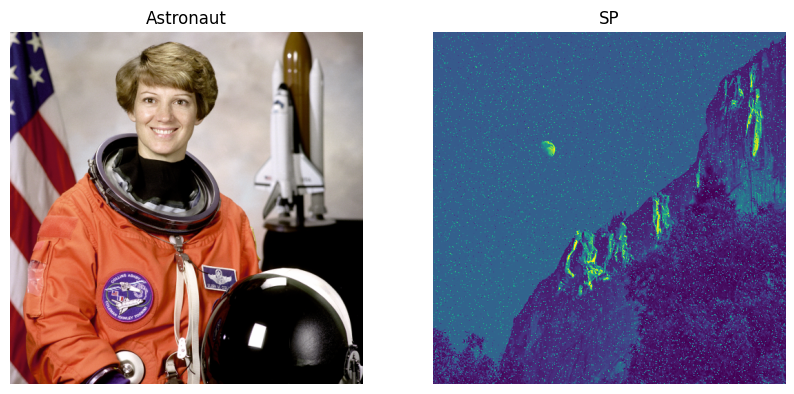

In [4]:
astronaut = data.astronaut()
sp = io.imread('SP.jpg')

fig,(astro, spimg)= plt.subplots(1,2,figsize=(10, 5))

astro.imshow(astronaut)
astro.set_title('Astronaut')
astro.axis('off')

spimg.imshow(sp)
spimg.set_title('SP')
spimg.axis('off')

## Question 1

### Part A

Applying two gaussian filter with sigmas 2 and 4 to the grayscae version of the astronaut image. Then plotting the two outputs and the difference between them.

(-0.5, 511.5, 511.5, -0.5)

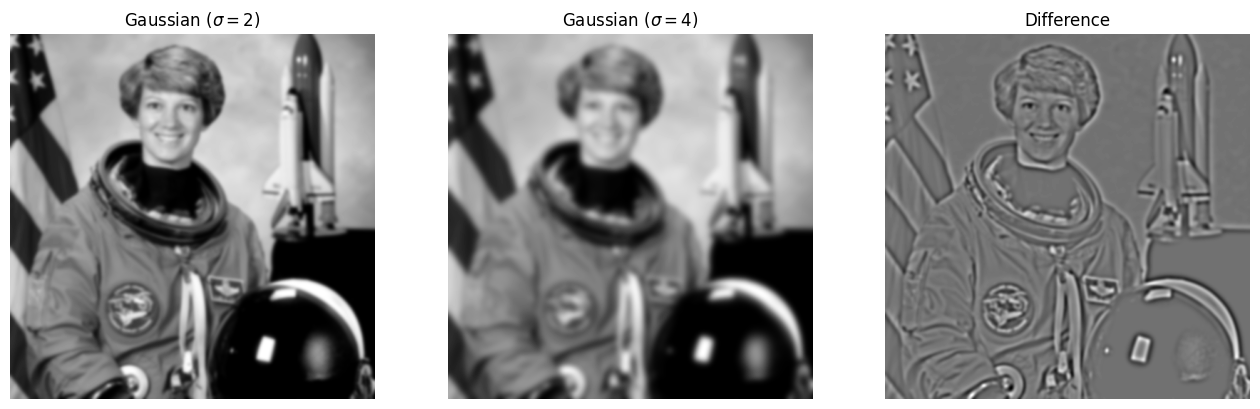

In [5]:
gray_astronaut = color.rgb2gray(astronaut) # to grayscale

# gaussian filter with different sigmas
gaussian_s2 = filters.gaussian(gray_astronaut, sigma=2)
gaussian_s4 = filters.gaussian(gray_astronaut, sigma=4)

gaussian_diff = gaussian_s2 - gaussian_s4 # difference image

# plotting
fig, (gauss2, gauss4, diff) = plt.subplots(1,3,figsize=(16, 8))

gauss2.imshow(gaussian_s2, 'gray')
gauss2.set_title('Gaussian ($\sigma=2$)')
gauss2.axis('off')

gauss4.imshow(gaussian_s4, 'gray')
gauss4.set_title('Gaussian ($\sigma=4$)')
gauss4.axis('off')

diff.imshow(gaussian_diff, 'gray')
diff.set_title('Difference')
diff.axis('off')

### Part B

Applying the median filter to remove the salt and pepper noise from the image.

(-0.5, 511.5, 511.5, -0.5)

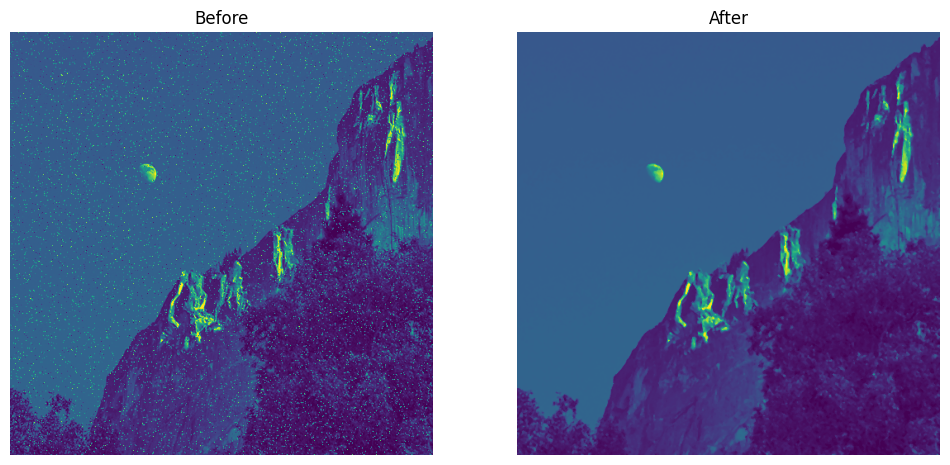

In [6]:
# applying median filter
sp_filtered = filters.median(sp)

# plotting
fig, (spimg, spfiltered) = plt.subplots(1,2,figsize=(12, 6))

spimg.imshow(sp)
spimg.set_title('Before')
spimg.axis('off')

spfiltered.imshow(sp_filtered)
spfiltered.set_title('After')
spfiltered.axis('off')

## Question 2

1. Loading the data

In [7]:
path = '../../Data/main/Oxford-Flowers/jpg'

imagelist = os.listdir(path)
if imagelist[-1] == 'Thumbs.db':
    imagelist = imagelist[:-1]

2. stretching out the pixels

In [8]:
def tinyImage(image):
    image_resized = transform.resize(image, (16, 16), anti_aliasing=True)
    return image_resized.flatten()

3. Defining the distance function (euclidean distance)

In [9]:
def euclideanDistance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

4. Extracting features

In [10]:
def extractTinyImageFeatures(imagelist, path):
    features = []
    for i, img_name in enumerate(imagelist):
        image = io.imread(f"{path}/{img_name}")
        features.append(tinyImage(image))
        print(f"\rProcessing {i + 1} of {len(imagelist)}", end='')
    print()
    return np.array(features)

5. Doing the experiment

In [11]:
def doExperiment(querynum, features, distance_func, imagelist, path, top_n=25):
    query_feature = features[querynum, :]
    distances = np.array([distance_func(query_feature, f) for f in features])
    order = np.argsort(distances)
    
    # Plotting
    fig = plt.figure(figsize=[16, 16])
    for i in range(top_n):
        image = io.imread(f"{path}/{imagelist[order[i]]}")
        fig.add_subplot(5, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')
        
    plt.show()

7. Getting the query image

800


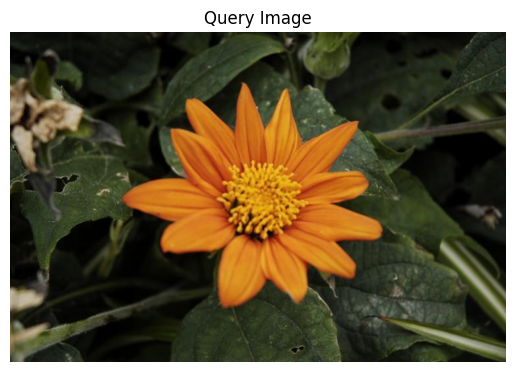

In [13]:
querynum = 800  # Randomly chosen
queryimage = io.imread(f"{path}/{imagelist[querynum]}")

print(querynum)
plt.imshow(queryimage)
plt.title("Query Image")
plt.axis('off')
plt.show()

8. Doing the experiment

Processing 8189 of 8189

Retrieval with Tiny Image feature and Euclidean distance:


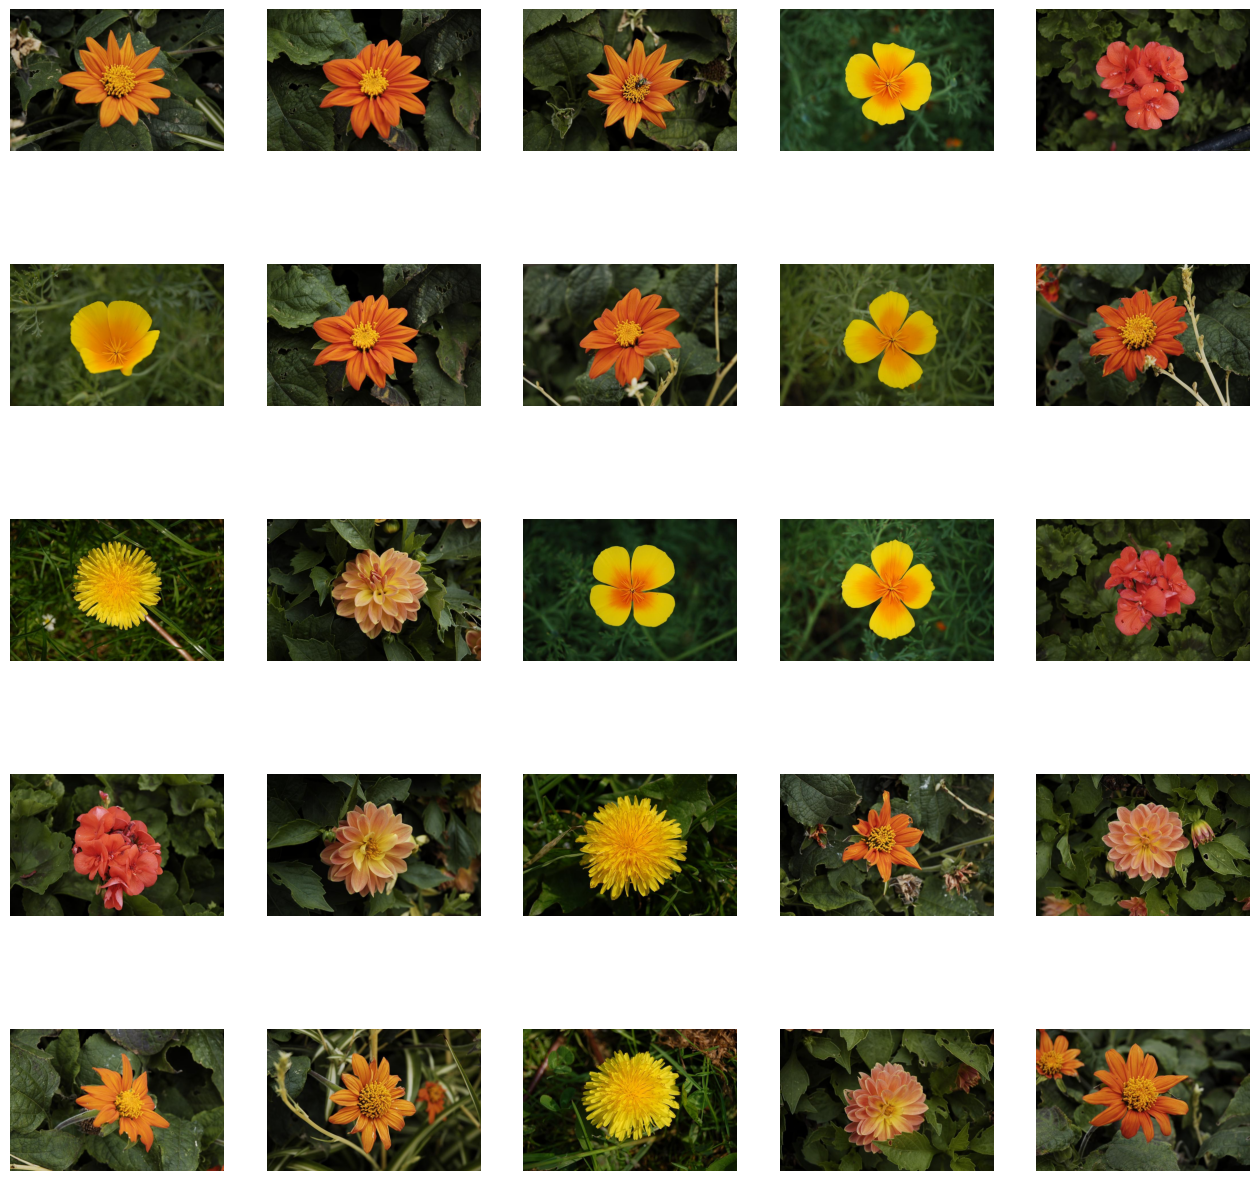

In [14]:
features = extractTinyImageFeatures(imagelist, path)

print("\nRetrieval with Tiny Image feature and Euclidean distance:")
doExperiment(querynum, features, euclideanDistance, imagelist, path)